- Build a Loan Approval Prediction Model using Jupyter Notebook.
Use machine learning techniques to predict whether a loan
application will be approved or not based on various factors such
as applicant income, loan amount, credit history, etc.
- Thus this is a classification problem with a specification of bnary classification where we have two possible outcomes Yes and No 


**Exploratory Data Analysis and Feature Engineering**

In [1]:
#importation of packages
import pandas as pd #data manipulation
import numpy as np #mathematical computations
%matplotlib inline
import matplotlib.pyplot as plt #visaualization
import seaborn as sns #visualization

In [2]:
#load the dataset
dataframe=pd.read_csv("c:\\Users\\ADMIN\\Documents\\Datasets\\loan.csv")
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- The lifecycle in any datascience project or rather it's workflow:
  1. Data Analysis
  2. Feature Engineering
  3. Feature Selection
  4. Model Building
  5. Model Deployment

**Exploratory Data Analysis**

In [3]:
print(len(dataframe))

614


In [4]:
dataframe[dataframe.duplicated(subset=['Loan_ID'],keep=False)]
#the code above is used to show any duplication of ros based on the loanID column specifically because it should be unique for any loan application i.e row
#From output where any instance of duplication is to shown we get an empty dataframe thus there's no repetition bas4d on transaction id

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [5]:
dataframe.shape

(614, 13)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
dataframe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
dataframe.select_dtypes(include=['object']).head()
#gives the first five rows of the dataframe where the columns are only of datatype object

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [9]:
dataframe.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

In [10]:
dataframe.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

In [11]:
dataframe.Dependents.value_counts(dropna=False)

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

In [12]:
dataframe.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [13]:
dataframe.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

In [14]:
dataframe.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [15]:
dataframe['Education'].value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
from typing import List
ordinal={'Education':['Not Graduate','Graduate'],
         'Dependents':['0','1','2','3+'],
         'Property_Area':['Rural','Semiurban','Urban']}

nominal=['Self_Employed','Gender','Married','Loan_Status']         

def convert_to_categorical(dataframe:pd.DataFrame,ordinal:dict,nominal:List)->pd.DataFrame:
    """
    This function converts columns of object datatype
    to be of categorical data type based on list and dictionary that are pre-defined
    to state which type of categorical data they fall under

    The function returns a dataframe with converted columns
    """
    for col in ordinal.keys():
        dataframe[col]=pd.Categorical(dataframe[col],categories=ordinal[col],ordered=True)
    for col in nominal:
        dataframe[col]=pd.Categorical(dataframe[col])    
    return dataframe
dataframe=convert_to_categorical(dataframe,ordinal,nominal)    

In [17]:
dataframe['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 34.0+ KB


In [19]:
dataframe.describe()
dataframe['ApplicantIncome']=dataframe['ApplicantIncome'].astype("float")
dataframe.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object

In [20]:
dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Visualization of numerival variable CoapplicantIncome**

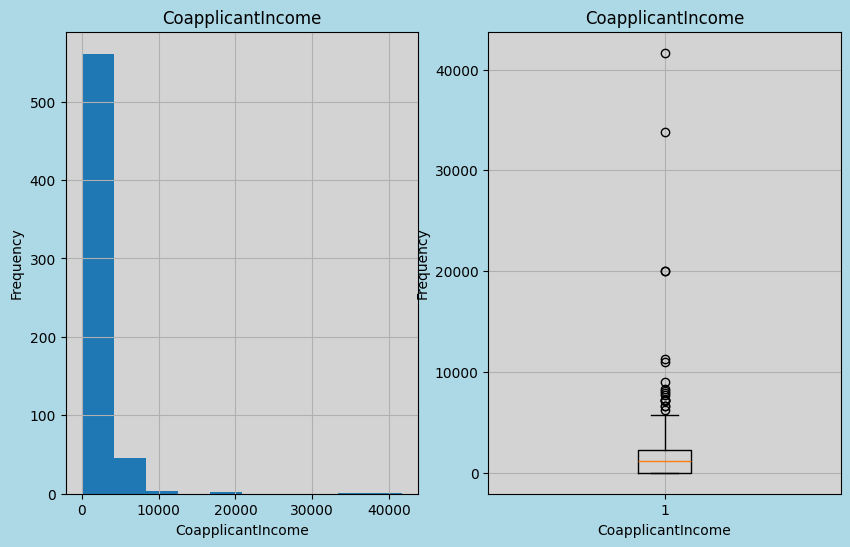

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.patch.set_facecolor('lightblue')

ax[0].hist(x=dataframe['CoapplicantIncome'])
ax[0].set_title('CoapplicantIncome')
ax[0].set_xlabel('CoapplicantIncome')
ax[0].set_ylabel('Frequency')  #   ax[0:0],ax[1:1]
ax[0].grid(True)
ax[0].set_facecolor('lightgray')

ax[1].boxplot(x=dataframe['CoapplicantIncome'])
ax[1].set_title('CoapplicantIncome')
ax[1].set_xlabel('CoapplicantIncome')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
ax[1].set_facecolor('lightgray')

In [22]:
dataframe['CoapplicantIncome'].quantile(0.75)

2297.25

In [23]:
print("Beyond 75%",len(dataframe[dataframe['CoapplicantIncome']>2297.25]))
print("Zero",len(dataframe[dataframe['CoapplicantIncome']==0]))
273+154

Beyond 75% 154
Zero 273


427

In [24]:

q3=dataframe['CoapplicantIncome'].quantile(0.75) 
q1=dataframe['CoapplicantIncome'].quantile(0.25)
iq=q3-q1
print(iq)
#lower_limit = q1 - 1.5*iq
upper_limit = q3 + 1.5*iq
print(upper_limit)

2297.25
5743.125


(array([294., 121., 100.,  43.,  25.,  13.,   3.,   6.,   3.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
        16000., 17000., 18000., 19000., 20000.]),
 <BarContainer object of 20 artists>)

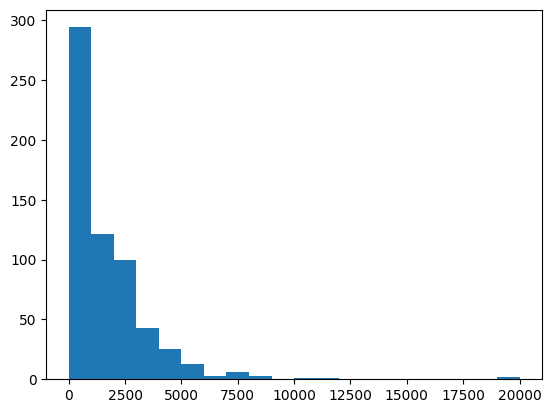

In [25]:
dataframe=dataframe.loc[dataframe['CoapplicantIncome']<=20000]
plt.hist(dataframe['CoapplicantIncome'],bins=20)

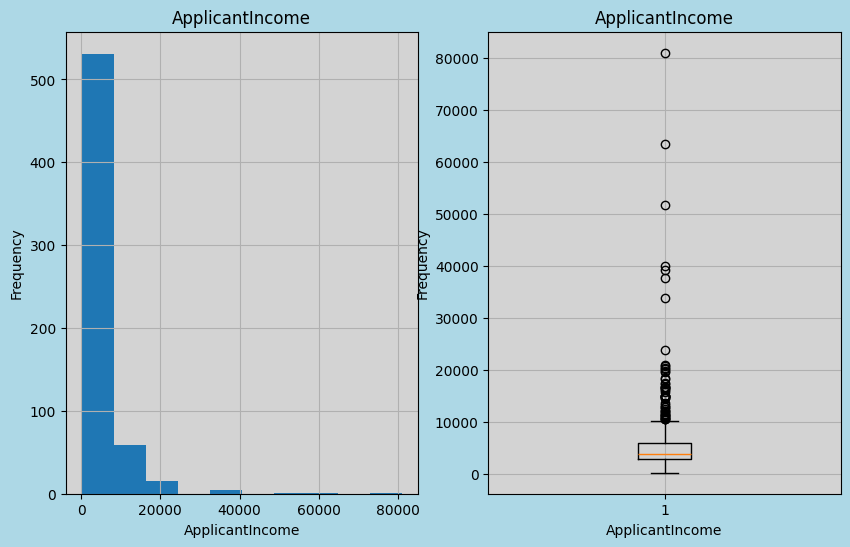

In [26]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.patch.set_facecolor('lightblue')

ax[0].hist(x=dataframe['ApplicantIncome'])
ax[0].set_title('ApplicantIncome')
ax[0].set_xlabel('ApplicantIncome')
ax[0].set_ylabel('Frequency')  #   ax[0:0],ax[1:1]
ax[0].grid(True)
ax[0].set_facecolor('lightgray')

ax[1].boxplot(x=dataframe['ApplicantIncome'])
ax[1].set_title('ApplicantIncome')
ax[1].set_xlabel('ApplicantIncome')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
ax[1].set_facecolor('lightgray')

In [27]:
dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,612.000000,590.000000,598.000000,563.000000
mean,5417.437908,1503.171438,146.162712,342.240803,0.841918
std,6113.985212,2062.456195,85.289086,64.886931,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2887.250000,0.000000,100.000000,360.000000,1.000000
50%,3813.500000,1149.000000,128.000000,360.000000,1.000000
75%,5803.750000,2277.000000,167.750000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


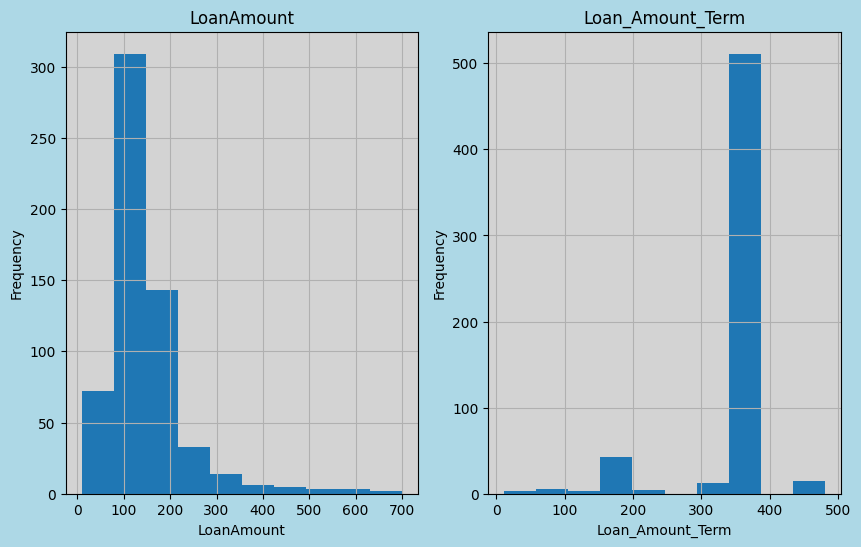

In [28]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.patch.set_facecolor('lightblue')

ax[0].hist(x=dataframe['LoanAmount'])
ax[0].set_title('LoanAmount')
ax[0].set_xlabel('LoanAmount')
ax[0].set_ylabel('Frequency')  #   ax[0:0],ax[1:1]
ax[0].grid(True)
ax[0].set_facecolor('lightgray')

ax[1].hist(x=dataframe['Loan_Amount_Term'])
ax[1].set_title('Loan_Amount_Term')
ax[1].set_xlabel('Loan_Amount_Term')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
ax[1].set_facecolor('lightgray')

#From output distributions are not that bad

## Dealing with missing values

<Axes: >

<Figure size 600x600 with 0 Axes>

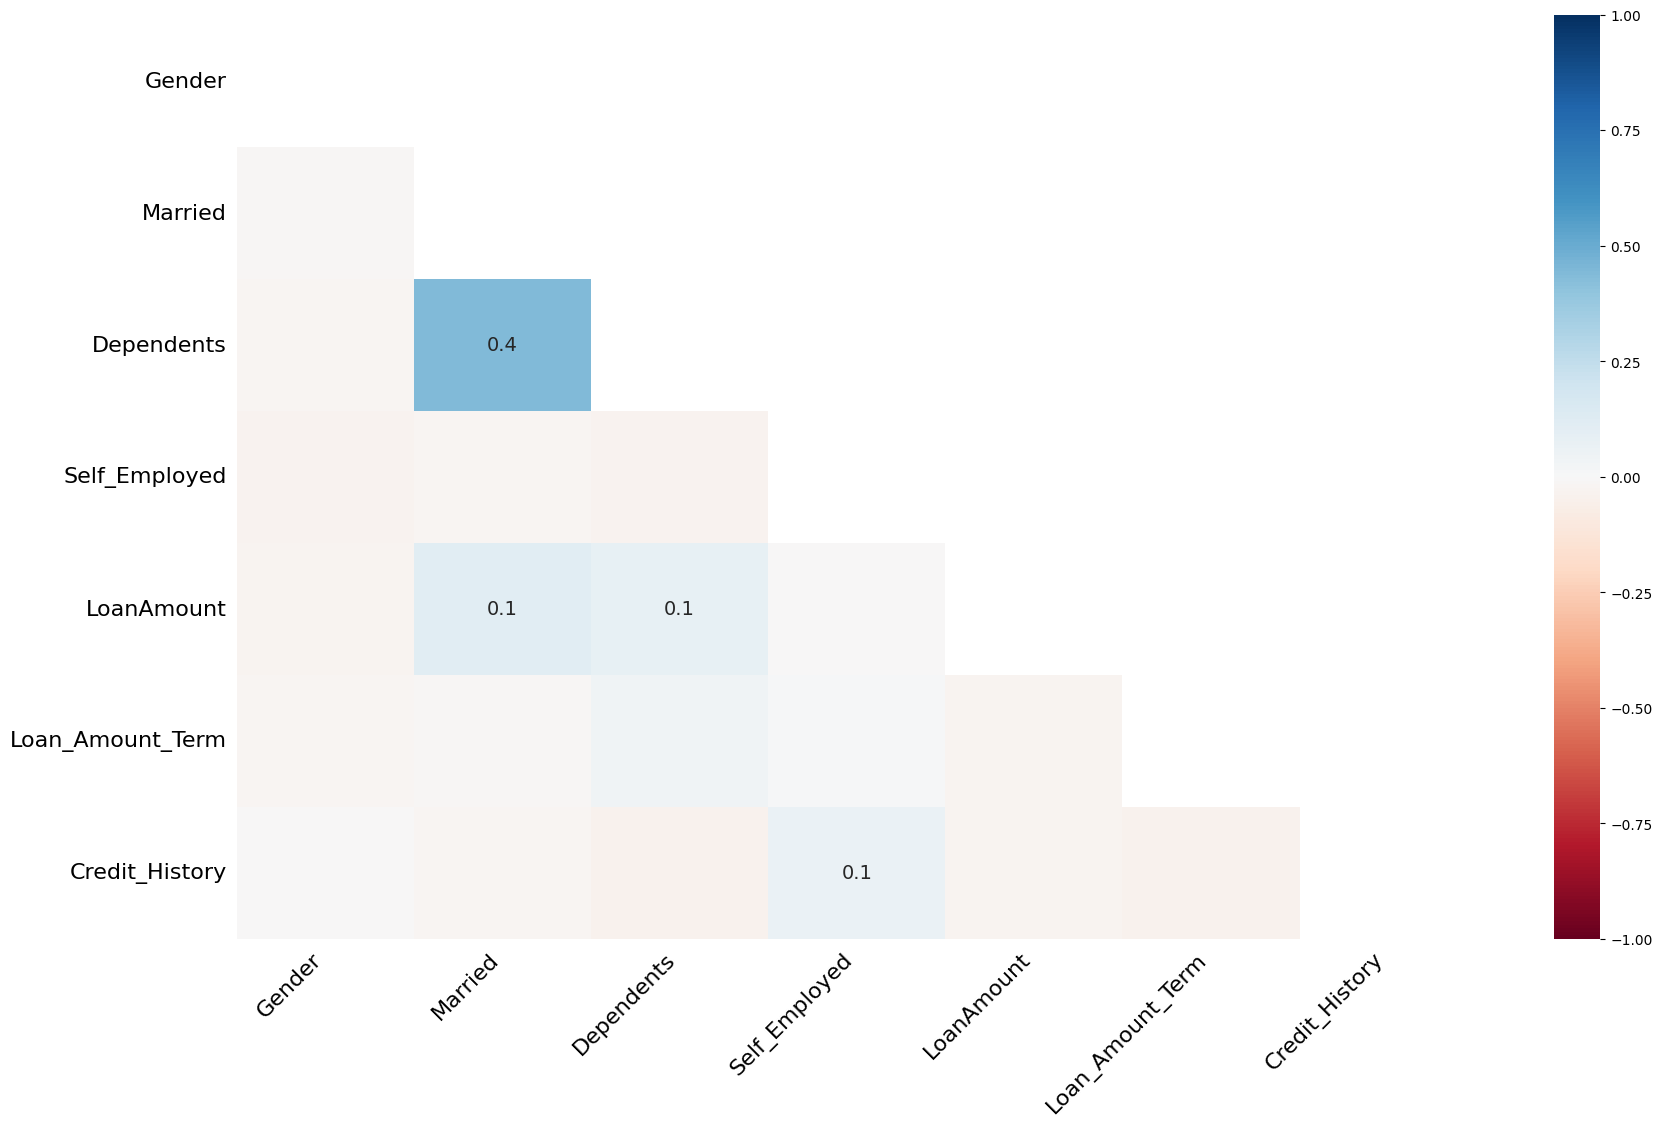

In [29]:
import missingno as msno
plt.figure(figsize=(6,6))
msno.heatmap(dataframe)
#msno.dendrogram(dataframe)
#msno.bar(dataframe)
#msno.matrix(dataframe)

In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            612 non-null    object  
 1   Gender             599 non-null    category
 2   Married            609 non-null    category
 3   Dependents         597 non-null    category
 4   Education          612 non-null    category
 5   Self_Employed      581 non-null    category
 6   ApplicantIncome    612 non-null    float64 
 7   CoapplicantIncome  612 non-null    float64 
 8   LoanAmount         590 non-null    float64 
 9   Loan_Amount_Term   598 non-null    float64 
 10  Credit_History     563 non-null    float64 
 11  Property_Area      612 non-null    category
 12  Loan_Status        612 non-null    category
dtypes: category(7), float64(5), object(1)
memory usage: 38.6+ KB


In [31]:
#using a threshold to define the maximum number of missing values in a row
# the threshold is 0.1 of the length of the dataframe amounting thatto aroung 61 rows 
# note that any column with 61 or more misssing vales is dropped 

threshold = 0.1*len(dataframe)#61.2 i.e approximately 61 columns
dataframe.columns[dataframe.isnull().sum() >= threshold]   

# from output  no column has 61 or more rows with missing values therefore we keep them

Index([], dtype='object')

In [32]:
print(dataframe['Loan_Status'].value_counts())
dataframe.isnull().sum()

Loan_Status
Y    422
N    190
Name: count, dtype: int64


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

Gender
Male      0.814691
Female    0.185309
Name: proportion, dtype: float64

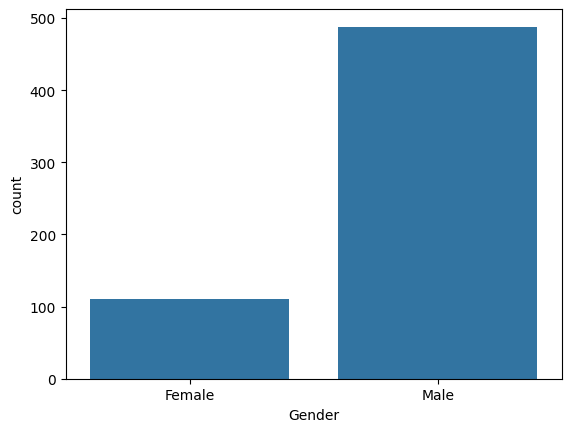

In [33]:
sns.countplot(data=dataframe,x='Gender')
dataframe['Gender'].value_counts(normalize=True)

In [34]:
print("Female",0.185309 * 13)
print("Male",0.814691 * 13)

Female 2.409017
Male 10.590983000000001


In [35]:
missing_index=dataframe.loc[dataframe['Gender'].isnull() == True]
missing_index=missing_index.index
print(missing_index)
for i in missing_index[0:2]:
    dataframe.loc[i,"Gender"]="Female"
for i in missing_index[2:]:
    dataframe.loc[i,"Gender"]="Male" 

dataframe.isnull().sum()

Index([23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592], dtype='int64')


Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
# dataframe['LoanAmount']=dataframe['LoanAmount'].fillna(0)
# dataframe.isnull().sum()

In [37]:
dataframe.loc[dataframe['Married'].isnull() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816.0,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758.0,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047.0,0.0,NaN,240.0,1.0,Semiurban,Y


In [38]:
dataframe=dataframe.reset_index(drop=False)
dataframe.isnull().sum()

index                 0
Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
dataframe['Married']=dataframe['Married'].cat.add_categories(["Unknown"])
dataframe['Dependents']=dataframe['Dependents'].cat.add_categories(["Unknown"])
for i in [104,228,435]:    
    dataframe.loc[i,"Married"]="Unknown"
    dataframe.loc[i,"Dependents"]="Unknown"
dataframe['Dependents']=dataframe['Dependents'].fillna("Unknown")

In [40]:
dataframe.isnull().sum()

index                 0
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

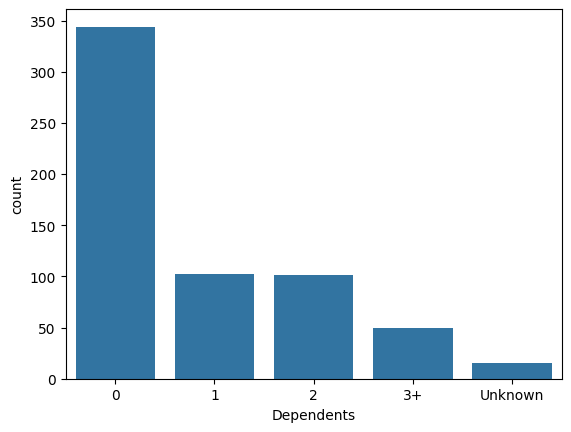

In [41]:
sns.countplot(data=dataframe ,x='Dependents')
plt.show()

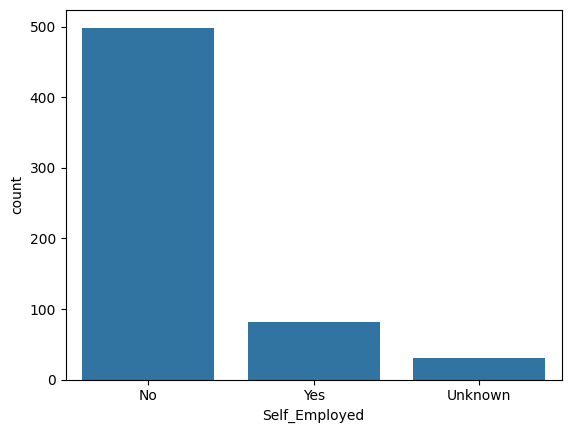

In [42]:
dataframe['Self_Employed']=dataframe['Self_Employed'].cat.add_categories(["Unknown"])
dataframe['Self_Employed']=dataframe['Self_Employed'].fillna("Unknown")
sns.countplot(data=dataframe ,x='Self_Employed')
plt.show()

In [43]:
#checking for entries where there's more than one occurence of string 'unknown' in Married,Dependents and Self_Employed columns
print(dataframe.loc[dataframe['Self_Employed']=="Unknown"][['Married','Dependents','Self_Employed']])
#from ouput there's no occurence of twice the string when self_employed is unknown

    Married Dependents Self_Employed
11      Yes          2       Unknown
19      Yes          0       Unknown
24      Yes          1       Unknown
29       No          2       Unknown
30      Yes          1       Unknown
95       No          0       Unknown
107      No          0       Unknown
111     Yes          0       Unknown
114      No          0       Unknown
158      No          0       Unknown
170     Yes          0       Unknown
218     Yes          2       Unknown
231     Yes          0       Unknown
236     Yes          0       Unknown
268      No          0       Unknown
295     Yes         3+       Unknown
333     Yes          0       Unknown
336     Yes          1       Unknown
344     Yes          2       Unknown
374      No          0       Unknown
380     Yes          0       Unknown
385      No          1       Unknown
411     Yes          0       Unknown
432      No          0       Unknown
447     Yes          0       Unknown
463      No          1       Unknown
4

In [44]:
dataframe.loc[dataframe['Married']=="Unknown"][['Married','Dependents','Self_Employed']]

,Married,Dependents,Self_Employed
104,Unknown,Unknown,No
228,Unknown,Unknown,No
435,Unknown,Unknown,No


In [ ]:
dataframe.loc[dataframe['Dependents']=="Unknown"][['Married','Dependents','Self_Employed']]

,Married,Dependents,Self_Employed
102,Yes,Unknown,No
104,Unknown,Unknown,No
120,Yes,Unknown,No
226,Yes,Unknown,Yes
228,Unknown,Unknown,No
293,No,Unknown,No
301,Yes,Unknown,No
332,No,Unknown,No
335,Yes,Unknown,Yes
346,Yes,Unknown,No


In [46]:
dataframe.loc[(dataframe['Self_Employed']=="Unknown") & (dataframe['Dependents']=="Unknown")][['Married','Dependents','Self_Employed']]

,Married,Dependents,Self_Employed


In [47]:
dataframe.isnull().sum()

index                 0
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

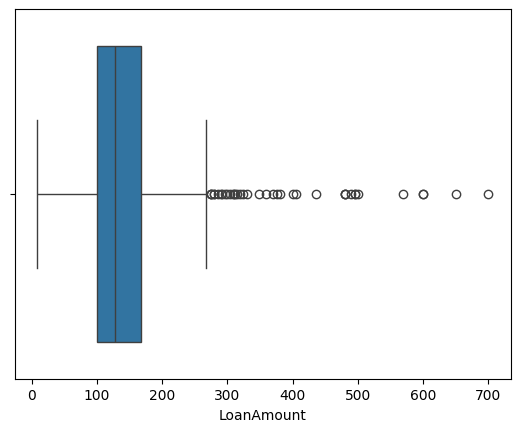

In [48]:
sns.boxplot(data=dataframe,x="LoanAmount")
plt.show()

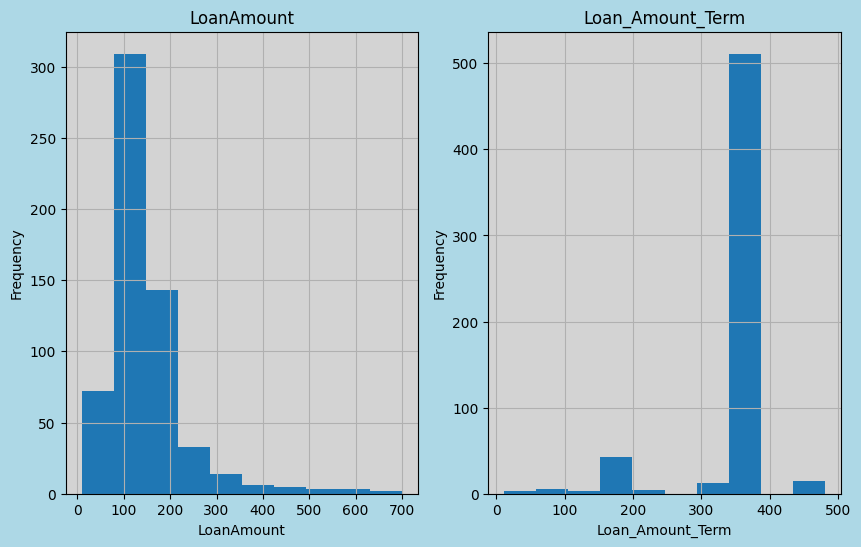

In [49]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.patch.set_facecolor('lightblue')

ax[0].hist(x=dataframe['LoanAmount'])
ax[0].set_title('LoanAmount')
ax[0].set_xlabel('LoanAmount')
ax[0].set_ylabel('Frequency')  #   ax[0:0],ax[1:1]
ax[0].grid(True)
ax[0].set_facecolor('lightgray')

ax[1].hist(x=dataframe['Loan_Amount_Term'])
ax[1].set_title('Loan_Amount_Term')
ax[1].set_xlabel('Loan_Amount_Term')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
ax[1].set_facecolor('lightgray')

#From output distributions are not that bad

In [50]:
print("Loan amount mean:",dataframe['LoanAmount'].mean())
print("Loan amount median:",dataframe['LoanAmount'].median())
print("Loan amount term mean:",dataframe['Loan_Amount_Term'].mean())
print("Loan amount term median:",dataframe['Loan_Amount_Term'].median())

Loan amount mean: 146.1627118644068
Loan amount median: 128.0
Loan amount term mean: 342.24080267558526
Loan amount term median: 360.0


In [51]:
#When carrying out imputation when data of a continuous numerical variable is skewed the median ismost preffered imputation strategy as it is not affected by extremes
#while when the data is having a normal distribution we use mean as mean and median are equal

#In this case let's use the median
from typing import List
from sklearn.impute import SimpleImputer
def imputations(df:pd.DataFrame,my_list):
    """This function is used to carry out imputation to colmns with skewed distributions.
    It makes use of simple imputer from sklearn using the strategy median
    Args:df:pd.DataFrame
            pandas dataframe containing the to be imputed columns
         list:list
            list of columns to be imputed
    Returns:
      A dataframe with imputed columns            
    """
    imputer=SimpleImputer(strategy='median')
    df[my_list]=imputer.fit_transform(df[my_list])
    return df

my_list=['LoanAmount','Loan_Amount_Term']    
dataframe=imputations(dataframe,my_list)

dataframe.isnull().sum()

index                 0
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

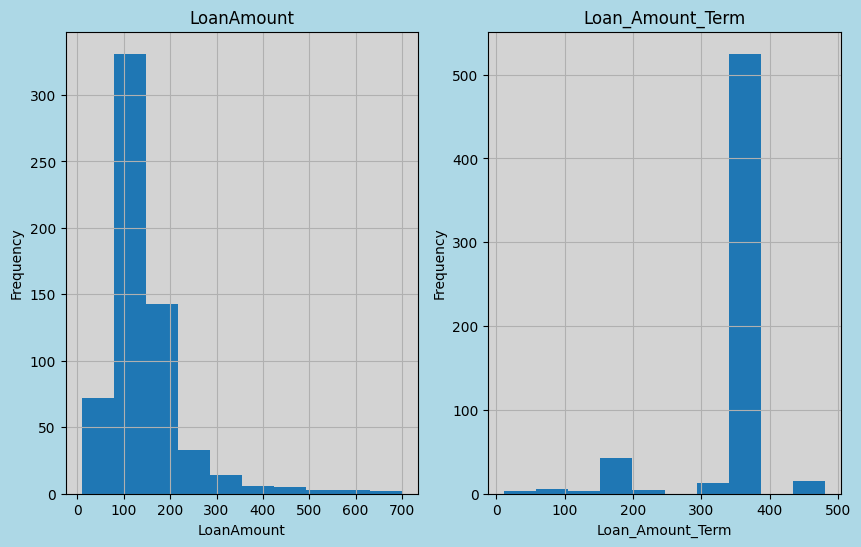

In [52]:
#visualizing to see the difference
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.patch.set_facecolor('lightblue')

ax[0].hist(x=dataframe['LoanAmount'])
ax[0].set_title('LoanAmount')
ax[0].set_xlabel('LoanAmount')
ax[0].set_ylabel('Frequency')  #   ax[0:0],ax[1:1]
ax[0].grid(True)
ax[0].set_facecolor('lightgray')

ax[1].hist(x=dataframe['Loan_Amount_Term'])
ax[1].set_title('Loan_Amount_Term')
ax[1].set_xlabel('Loan_Amount_Term')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
ax[1].set_facecolor('lightgray')

#From output distributions are not that bad
#distributions kinda do remain same

In [53]:
dataframe.describe()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,612.000000,612.000000,612.000000,612.000000,563.000000
mean,305.571895,5417.437908,1503.171438,145.509804,342.647059,0.841918
std,176.933129,6113.985212,2062.456195,83.807871,64.194260,0.365142
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,152.750000,2887.250000,0.000000,100.750000,360.000000,1.000000
50%,305.500000,3813.500000,1149.000000,128.000000,360.000000,1.000000
75%,458.250000,5803.750000,2277.000000,164.250000,360.000000,1.000000
max,613.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


**Dealing with the credit history column**
- Note the 0 indicates no credit history while the 1 indcates some credit history
now how do we cater for the missing values without basically dropping down the rows
- we can set missing values i.e unknown to 0 those with no history to 1 and those with history to 2,Reason for this cahange is because we want to create some order showing that one with credit history i.e 2 is higher than onw ith no credit history 
- which on the other hand is higher than one with unknown credit history i.e 0, we can do this by using the map function and lambda function

Credit_History
1.0    474
0.0     89
NaN     49
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

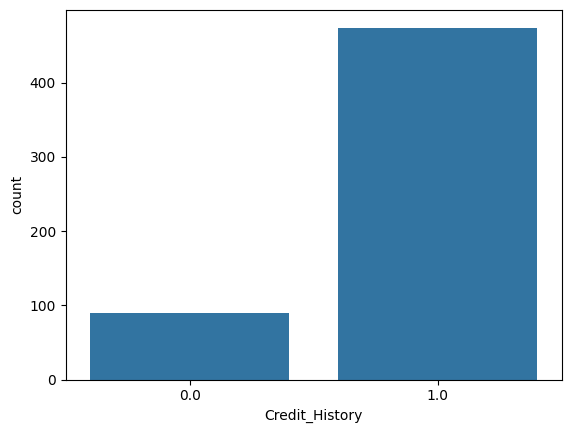

In [54]:
print(dataframe['Credit_History'].value_counts(dropna=False))
sns.countplot(data=dataframe,x="Credit_History")

Credit_History
2    474
1     89
0     49
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

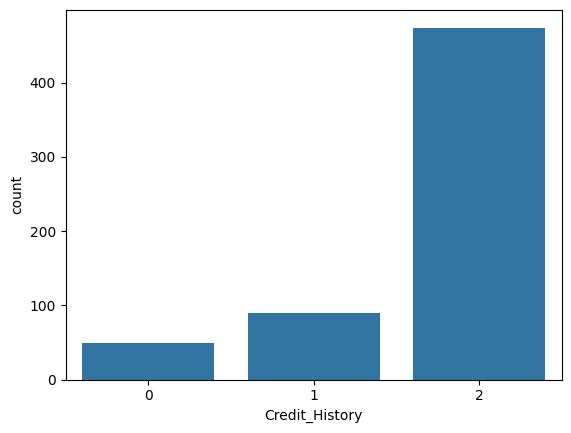

In [55]:
dataframe['Credit_History']=dataframe['Credit_History'].fillna("Unknown")
dataframe['Credit_History'] = dataframe['Credit_History'].map(lambda x: 0 if x == 'Unknown' else 1 if x == 0.0 else 2)
print(dataframe['Credit_History'].value_counts(dropna=False))
sns.countplot(data=dataframe,x="Credit_History")

In [56]:
dataframe['Credit_History'].dtype

dtype('int64')

- **Things not done but to highlight**:
   1. interpolation(Quadratic,linear,nearest value)
   2. hypothesis testing
   3. distributions 
   4. fillna

- We have done various data preprocessing concepts i.e data cleaning:
   1. data type validation
   2. dealing with missing values
   3. dealing with some outliers
- **Let's delve a little deeper to make the data now preproceesed to use for the model by carrying out**
  1. encoding of categorical columns
  2. standardization if need be
  3. this been a classification task oversampling might also be required   

   

**Data Encoding**
- There are tw major branches of data encoding o.e nominal encoding and ordinal encoding which fall under nominal and categorical data respectively
- Thus various categorical columns call for different encoding techniques as per their type that is nominal and ordinal
- we are going to start with nominal i.e loan_ID,Gender,Married,Self Employed


In [57]:
dataframe=dataframe.reset_index(drop=True)
dataframe.select_dtypes(exclude=['int','float'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
607,LP002978,Female,No,0,Graduate,No,Rural,Y
608,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
609,LP002983,Male,Yes,1,Graduate,No,Urban,Y
610,LP002984,Male,Yes,2,Graduate,No,Urban,Y


LoanID

In [58]:
print(len(dataframe['Loan_ID'].str.contains("LP00")))
#from output all rows have a common part of the string "LP00" in the Loan_ID column

def make_loan_id_numerical(df:pd.DataFrame,col:str)->pd.DataFrame:
    """ Remove the common part of all loanid entiries in all rows to mremain with the numeical parts only"""
    df[col] = df[col].str.replace("LP00", "")
    return df

dataframe=make_loan_id_numerical(dataframe, "Loan_ID")    
print(dataframe['Loan_ID'].nunique())

612
612


In [59]:
print(dataframe['Loan_ID'].dtype)
dataframe['Loan_ID'] = dataframe['Loan_ID'].astype('int')
print(dataframe['Loan_ID'].dtype)
#the pandas series allowing for a conversion to numerical indcates that all entries/rows of the Loan_ID columns are valid to be converted to int datatype


object
int32


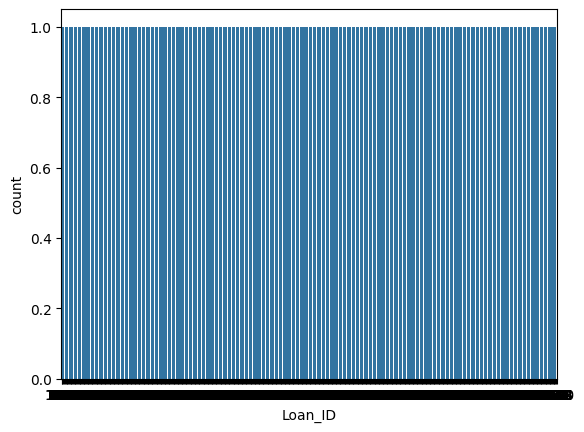

In [60]:
#Let's us visualize the column which should have a uniform distribution as all entries are unique and ccur only once
sns.countplot(data=dataframe,x="Loan_ID")
plt.show()

- Gender,Married,Self Employed:
  - We are going use ordinal encoding as we do not have many categories for each column i.e gender has 2,married has 3 and self_employed has 3
  - Note for each column the number of columns we get are number of categories -1
  - Therefore i expect 3+3+2-3=5 new columns and the final dataframe should have (13-3)+5=15 columns 

In [61]:
print(dataframe['Gender'].value_counts(dropna=False))
print()
print(dataframe['Married'].value_counts(dropna=False))
print()
print(dataframe['Self_Employed'].value_counts(dropna=False))

Gender
Male      499
Female    113
Name: count, dtype: int64

Married
Yes        398
No         211
Unknown      3
Name: count, dtype: int64

Self_Employed
No         499
Yes         82
Unknown     31
Name: count, dtype: int64


- When sparse_output=True (default), the output is returned as a sparse matrix
,When sparse_output=False, the output is returned as a regular dense numpy array
- Sparse matrices are memory efficient when you have lots of zeros in your data because they only store non-zero values [1]
- Use sparse_output=False when you want to directly work with the array or integrate with other libraries that don't handle sparse matrices well

In [ ]:
#To carry out one hot encoding we use onehotencoder form sklearn or pandas method get_dummies

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
oh=OneHotEncoder(drop='first',sparse_output=False)# drop='last' removes one column to avoid dummy variable trap
#when sparse_output=False, the output is returned as a regular dense numpy array

encoded_array=oh.fit_transform(dataframe[['Gender','Married','Self_Employed']])

#get_feature_names
feature_names=oh.get_feature_names_out(['Gender', 'Married', 'Self_Employed'])

#dataframe creation
encoded_dataframe=pd.DataFrame(encoded_array, columns=feature_names)
encoded_dataframe

,Gender_Male,Married_Unknown,Married_Yes,Self_Employed_Unknown,Self_Employed_Yes
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
607,0.0,0.0,0.0,0.0,0.0
608,1.0,0.0,1.0,0.0,0.0
609,1.0,0.0,1.0,0.0,0.0
610,1.0,0.0,1.0,0.0,0.0


In [63]:
from pyspark.sql.functions import col
def editting_dataframe(encoded:pd.DataFrame,original:pd.DataFrame)->pd.DataFrame:
    """This function is used to create columns in the coriginal dataframe that are in the 2nd dataframe.
    Args:
    encoded (pd.DataFrame): The encoded dataframe.
    original (pd.DataFrame): The originaldataframe.
    Returns:
    pd.DataFrame: The original dataframe with the columns from the encoded
    dataframe.
    """
    for col in encoded.columns:
        original[col] = encoded[col]
    original=original.drop(columns=['Gender','Married','Self_Employed'])
    return original

dataframe=editting_dataframe(encoded_dataframe,dataframe)
print("I now have:",len(dataframe.columns)," columns")
dataframe.columns
             

I now have: 16  columns


Index(['index', 'Loan_ID', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Gender_Male', 'Married_Unknown',
       'Married_Yes', 'Self_Employed_Unknown', 'Self_Employed_Yes'],
      dtype='object')

In [64]:
dataframe=dataframe.drop(columns=['index'])
dataframe.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Unknown,Married_Yes,Self_Employed_Unknown,Self_Employed_Yes
0,1002,0,Graduate,5849.0,0.0,128.0,360.0,2,Urban,Y,1.0,0.0,0.0,0.0,0.0
1,1003,1,Graduate,4583.0,1508.0,128.0,360.0,2,Rural,N,1.0,0.0,1.0,0.0,0.0
2,1005,0,Graduate,3000.0,0.0,66.0,360.0,2,Urban,Y,1.0,0.0,1.0,0.0,1.0
3,1006,0,Not Graduate,2583.0,2358.0,120.0,360.0,2,Urban,Y,1.0,0.0,1.0,0.0,0.0
4,1008,0,Graduate,6000.0,0.0,141.0,360.0,2,Urban,Y,1.0,0.0,0.0,0.0,0.0


In [65]:
dataframe.dtypes

Loan_ID                     int32
Dependents               category
Education                category
ApplicantIncome           float64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History              int64
Property_Area            category
Loan_Status              category
Gender_Male               float64
Married_Unknown           float64
Married_Yes               float64
Self_Employed_Unknown     float64
Self_Employed_Yes         float64
dtype: object

- Now dealing with ordinal categorical columns we are going to use ordinalEncoder
- OrdinalEncoder is preferred when dealing with truly ordinal data,The order should reflect the natural hierarchy in your data and Keep track of the encoding order for later interpretation
- Dependents,Education,Property Area

In [66]:
# # # Define mappings for different ordinal variables
# # education_mapping = {
# #     'Not Graduate': 0,
# #     'Graduate': 1
# # }

# # property_area_mapping = {
# #     'Rural': 0,
# #     'Semiurban': 1,
# #     'Urban': 2
# # }

# # # Apply mappings
# # dataframe['Education'] = dataframe['Education'].map(education_mapping)
# # dataframe['Property_Area'] = dataframe['Property_Area'].map(property_area_mapping)
# # #


# from sklearn.preprocessing import LabelEncoder

# class OrdinalLabelEncoder(LabelEncoder):
#     def __init__(self, ordering=None):
#         super().__init__()
#         self.ordering = ordering

#     def fit(self, y):
#         if self.ordering is None:
#             return super().fit(y)
#         self.classes_ = np.array(self.ordering)
#         return self

# # Usage example
# order = ['Not Graduate', 'Graduate']  # Specify your desired order
# encoder = OrdinalLabelEncoder(ordering=order)
# dataframe['Education'] = encoder.fit_transform(dataframe['Education'])


In [67]:
from sklearn.preprocessing import OrdinalEncoder

# Define categories for each column in desired order
category_orders = [
    ['Not Graduate', 'Graduate'],  # Education categories
    ['Rural', 'Semiurban', 'Urban'],  # Property_Area categories
    ['Unknown', '0', '1', '2', '3+']  # Dependents categories
]

# Initialize encoder
ordinal_encoder = OrdinalEncoder(categories=category_orders)

# Fit and transform
columns_to_encode = ['Education', 'Property_Area', 'Dependents']
dataframe[columns_to_encode] = ordinal_encoder.fit_transform(dataframe[columns_to_encode])

# If you want to see the encoding mapping
for i, column in enumerate(columns_to_encode):
    print(f"\nMapping for {column}:")
    for j, category in enumerate(category_orders[i]):
        print(f"{category}: {j}")



Mapping for Education:
Not Graduate: 0
Graduate: 1

Mapping for Property_Area:
Rural: 0
Semiurban: 1
Urban: 2

Mapping for Dependents:
Unknown: 0
0: 1
1: 2
2: 3
3+: 4


In [68]:
dataframe

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Unknown,Married_Yes,Self_Employed_Unknown,Self_Employed_Yes
0,1002,1.0,1.0,5849.0,0.0,128.0,360.0,2,2.0,Y,1.0,0.0,0.0,0.0,0.0
1,1003,2.0,1.0,4583.0,1508.0,128.0,360.0,2,0.0,N,1.0,0.0,1.0,0.0,0.0
2,1005,1.0,1.0,3000.0,0.0,66.0,360.0,2,2.0,Y,1.0,0.0,1.0,0.0,1.0
3,1006,1.0,0.0,2583.0,2358.0,120.0,360.0,2,2.0,Y,1.0,0.0,1.0,0.0,0.0
4,1008,1.0,1.0,6000.0,0.0,141.0,360.0,2,2.0,Y,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2978,1.0,1.0,2900.0,0.0,71.0,360.0,2,0.0,Y,0.0,0.0,0.0,0.0,0.0
608,2979,4.0,1.0,4106.0,0.0,40.0,180.0,2,0.0,Y,1.0,0.0,1.0,0.0,0.0
609,2983,2.0,1.0,8072.0,240.0,253.0,360.0,2,2.0,Y,1.0,0.0,1.0,0.0,0.0
610,2984,3.0,1.0,7583.0,0.0,187.0,360.0,2,2.0,Y,1.0,0.0,1.0,0.0,0.0


- Now all columns are in numeric dtypes apart from our target column whch is binary let's deal with that

In [69]:
dataframe['Loan_Status'].value_counts(dropna=False)

Loan_Status
Y    422
N    190
Name: count, dtype: int64

In [70]:
mappings={
    "Y":1,
    "N":0
}
dataframe['Loan_Status']=dataframe['Loan_Status'].map(mappings)
dataframe['Loan_Status'].value_counts()

Loan_Status
1    422
0    190
Name: count, dtype: int64

In [71]:
dataframe.dtypes
#So far all columns are in numeric format as erthe requirementsof model building

Loan_ID                     int32
Dependents                float64
Education                 float64
ApplicantIncome           float64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History              int64
Property_Area             float64
Loan_Status              category
Gender_Male               float64
Married_Unknown           float64
Married_Yes               float64
Self_Employed_Unknown     float64
Self_Employed_Yes         float64
dtype: object

**Feature Scaling**
- This involves scaling the features to ensure that they are of the same scale
_ Note: When i state features the target column is excluded thus no scaling occurs on the target column
- From the look of thing on our data we  for sure need to scale that data
- We are going to use the standard scaler

In [72]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
features=['Loan_ID','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Gender_Male','Married_Unknown','Married_Yes','Self_Employed_Unknown','Self_Employed_Yes']
dataframe[features]=ss.fit_transform(dataframe[features])
dataframe=dataframe.set_index('Loan_ID')
dataframe

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Unknown,Married_Yes,Self_Employed_Unknown,Self_Employed_Yes
Loan_ID,,,,,,,,,,,,,,
-1.760345,-0.692795,0.529466,0.070644,-0.729422,-0.209099,0.270540,0.500761,1.228303,1,0.475871,-0.070186,-1.363750,-0.23099,-0.393341
-1.758575,0.273015,0.529466,-0.136592,0.002343,-0.209099,0.270540,0.500761,-1.315593,0,0.475871,-0.070186,0.733272,-0.23099,-0.393341
-1.755036,-0.692795,0.529466,-0.395718,-0.729422,-0.949491,0.270540,0.500761,1.228303,1,0.475871,-0.070186,0.733272,-0.23099,2.542325
-1.753267,-0.692795,-1.888694,-0.463978,0.414810,-0.304633,0.270540,0.500761,1.228303,1,0.475871,-0.070186,0.733272,-0.23099,-0.393341
-1.749727,-0.692795,0.529466,0.095361,-0.729422,-0.053855,0.270540,0.500761,1.228303,1,0.475871,-0.070186,-1.363750,-0.23099,-0.393341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.736369,-0.692795,0.529466,-0.412088,-0.729422,-0.889782,0.270540,0.500761,-1.315593,1,-2.101411,-0.070186,-1.363750,-0.23099,-0.393341
1.738138,2.204636,0.529466,-0.214674,-0.729422,-1.259978,-2.535742,0.500761,-1.315593,1,0.475871,-0.070186,0.733272,-0.23099,-0.393341
1.745217,0.273015,0.529466,0.434534,-0.612961,1.283628,0.270540,0.500761,1.228303,1,0.475871,-0.070186,0.733272,-0.23099,-0.393341


**Data Splitting**

In [73]:
x=dataframe.drop(columns=['Loan_Status'])
y=dataframe['Loan_Status']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)
x_train

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Unknown,Married_Yes,Self_Employed_Unknown,Self_Employed_Yes
Loan_ID,,,,,,,,,,,,,
-1.270168,-0.692795,0.529466,-0.499500,0.498759,-0.113564,0.270540,0.500761,-0.043645,0.475871,-0.070186,-1.363750,-0.230990,-0.393341
0.260529,-1.658606,0.529466,-0.262636,-0.729422,-0.352401,-2.535742,0.500761,1.228303,-2.101411,-0.070186,-1.363750,-0.230990,-0.393341
0.688770,-0.692795,0.529466,1.220916,-0.729422,3.098784,0.270540,0.500761,-0.043645,0.475871,-0.070186,-1.363750,4.329196,-0.393341
-1.201154,1.238825,0.529466,0.136285,2.014212,0.507410,-2.535742,0.500761,-0.043645,0.475871,-0.070186,0.733272,-0.230990,-0.393341
1.493935,-0.692795,0.529466,-0.368545,0.272145,-0.495702,0.270540,-1.138094,1.228303,0.475871,-0.070186,0.733272,-0.230990,-0.393341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.968366,0.273015,-1.888694,-0.566287,0.452660,-0.173273,0.270540,0.500761,-1.315593,0.475871,-0.070186,0.733272,-0.230990,-0.393341
0.435719,-0.692795,-1.888694,-0.394081,0.792339,-0.209099,0.270540,-1.138094,1.228303,0.475871,-0.070186,0.733272,-0.230990,-0.393341
0.237524,1.238825,-1.888694,-0.382132,0.322612,-0.232982,0.270540,0.500761,1.228303,0.475871,-0.070186,0.733272,-0.230990,-0.393341


In [74]:
import pandas as pd
print(y_train.shape,x_train.shape)
y_train=y_train.values.reshape((-1,1))
training_data=np.hstack((x_train,y_train))
training_data=pd.DataFrame(training_data)
training_data.shape

(489,) (489, 13)


(489, 14)

**Oversampling**
- This is done toovercome imblanace in the target column as per the  respective calsses found in it
- We ave to do this as the calsses 1 and 0 have a frequency 337 and 152 respectively which is an imbalance and may lead to some bias in the model

In [75]:
print("Loan status 1:",len(training_data.loc[training_data[13]==1]))
print("Loan status 1:",len(training_data.loc[training_data[13]==0]))
training_data

Loan status 1: 337
Loan status 1: 152


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.692795,0.529466,-0.499500,0.498759,-0.113564,0.270540,0.500761,-0.043645,0.475871,-0.070186,-1.363750,-0.230990,-0.393341,1.0
1,-1.658606,0.529466,-0.262636,-0.729422,-0.352401,-2.535742,0.500761,1.228303,-2.101411,-0.070186,-1.363750,-0.230990,-0.393341,1.0
2,-0.692795,0.529466,1.220916,-0.729422,3.098784,0.270540,0.500761,-0.043645,0.475871,-0.070186,-1.363750,4.329196,-0.393341,1.0
3,1.238825,0.529466,0.136285,2.014212,0.507410,-2.535742,0.500761,-0.043645,0.475871,-0.070186,0.733272,-0.230990,-0.393341,1.0
4,-0.692795,0.529466,-0.368545,0.272145,-0.495702,0.270540,-1.138094,1.228303,0.475871,-0.070186,0.733272,-0.230990,-0.393341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.273015,-1.888694,-0.566287,0.452660,-0.173273,0.270540,0.500761,-1.315593,0.475871,-0.070186,0.733272,-0.230990,-0.393341,1.0
485,-0.692795,-1.888694,-0.394081,0.792339,-0.209099,0.270540,-1.138094,1.228303,0.475871,-0.070186,0.733272,-0.230990,-0.393341,0.0
486,1.238825,-1.888694,-0.382132,0.322612,-0.232982,0.270540,0.500761,1.228303,0.475871,-0.070186,0.733272,-0.230990,-0.393341,1.0
487,2.204636,0.529466,-0.118913,-0.729422,-0.543470,0.270540,0.500761,-0.043645,0.475871,-0.070186,0.733272,-0.230990,-0.393341,1.0


In [76]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resampled,y_resampled=ros.fit_resample(x_train,y_train)
print("\nResampled class distribution:")
print(pd.Series(y_resampled).value_counts())



Resampled class distribution:
1    337
0    337
Name: count, dtype: int64


In [77]:
y_resampl=y_resampled.reshape(-1,1)
resampled_data=np.hstack((x_resampled,y_resampl))
print(type(resampled_data))
resampled_data=pd.DataFrame(resampled_data)


<class 'numpy.ndarray'>


In [78]:
print("Loan status 1:",len(resampled_data.loc[resampled_data[13]==1]))
print("Loan status 0:",len(resampled_data.loc[resampled_data[13]==0]))
resampled_data

Loan status 1: 337
Loan status 0: 337


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.692795,0.529466,-0.499500,0.498759,-0.113564,0.270540,0.500761,-0.043645,0.475871,-0.070186,-1.363750,-0.230990,-0.393341,1.0
1,-1.658606,0.529466,-0.262636,-0.729422,-0.352401,-2.535742,0.500761,1.228303,-2.101411,-0.070186,-1.363750,-0.230990,-0.393341,1.0
2,-0.692795,0.529466,1.220916,-0.729422,3.098784,0.270540,0.500761,-0.043645,0.475871,-0.070186,-1.363750,4.329196,-0.393341,1.0
3,1.238825,0.529466,0.136285,2.014212,0.507410,-2.535742,0.500761,-0.043645,0.475871,-0.070186,0.733272,-0.230990,-0.393341,1.0
4,-0.692795,0.529466,-0.368545,0.272145,-0.495702,0.270540,-1.138094,1.228303,0.475871,-0.070186,0.733272,-0.230990,-0.393341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,-0.692795,0.529466,-0.307488,-0.061711,-1.080851,0.270540,0.500761,-1.315593,0.475871,-0.070186,0.733272,4.329196,-0.393341,0.0
670,-0.692795,-1.888694,-0.441552,-0.729422,-0.782306,0.270540,-1.138094,1.228303,-2.101411,-0.070186,-1.363750,-0.230990,-0.393341,0.0
671,0.273015,0.529466,0.160839,2.788680,0.411875,0.270540,-1.138094,1.228303,0.475871,-0.070186,0.733272,-0.230990,-0.393341,0.0
672,1.238825,0.529466,0.553539,-0.729422,1.343337,0.270540,-1.138094,1.228303,0.475871,-0.070186,0.733272,-0.230990,-0.393341,0.0


**Modelling**
- We are going to use various classification models i.e:
   1. Logistic Regression
   2. Naive Bayes
   3. Support Vector Machine
   4. K Nearest Neighors
   5. Neural Networks
- The best performing will be the model we recommend for use

**Naive Bayes**
- To understand the concept and modelling using naive bayes one needs to understand the 2 key principles used by naive bayes mode:
  1. conditional probability:comes into play when probability of occurence of a particular event changes when one or more conditions are satisfied
  2. Bayes rule:Which explains that all inputs are independent
- Reason for the name __naive__ bayes is because it assumes all features in the feature matrix are independent
- Types of naive bayes:
   1. GaussianNB: For continuous data, assumes features follow normal distribution
   2. MultinomialNB: Good for discrete data (e.g., word counts in text)
   3. BernoulliNB: Good for binary/boolean features
- Remember that feature independence assumption means that the presence of one feature doesn't affect the presence of another feature, which is why it's called "naive". Despite this limitation, it often performs surprisingly well in practice.     

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nb=GaussianNB()
nb.fit(x_resampled,y_resampled)
y_pred=nb.predict(x_test)
#print(classification_report(y_test, y_pred))
print("R^2 on the training data:",nb.score(x_resampled,y_resampled))
print("R^2 on the test data:",nb.score(x_test,y_test))

#poor performance
print("Accuracy:", accuracy_score(y_test, y_pred))

R^2 on the training data: 0.5237388724035609
R^2 on the test data: 0.2926829268292683
Accuracy: 0.2926829268292683


**Support Vector Machine**

-it is uses a boundary i.e a line in 2d ,plane in 3d etc with the highest margin(the margins are provided by the closest point on bothnclaases near the boundary and are refered to as _support vectors_ hence the name support vector machines).
- It is also good to note that Support Vector Machine model is not roust to outliers therefore in a case where there are outliers it is not the best model to be used

- In a case we apply some transformations where y or x1 is x**2 that is called the **kernel trick**

In [80]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_resampled,y_resampled)
preds=svm_model.predict(x_test)
print(svm_model.score(x_resampled,y_resampled))
print(svm_model.score(x_test,y_test))

0.7952522255192879
0.7642276422764228


## K Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_resampled,y_resampled)
prediction=knn.predict(x_test)
print(prediction)

[1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 1]


In [82]:
accuracy_train=knn.score(x_resampled,y_resampled)
print(accuracy_train)
accuracy_test=knn.score(x_test,y_test)
print(accuracy_test)

0.827893175074184
0.6666666666666666


In [83]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.47      0.55      0.51        38
           1       0.78      0.72      0.75        85

    accuracy                           0.67       123
   macro avg       0.62      0.64      0.63       123
weighted avg       0.68      0.67      0.67       123



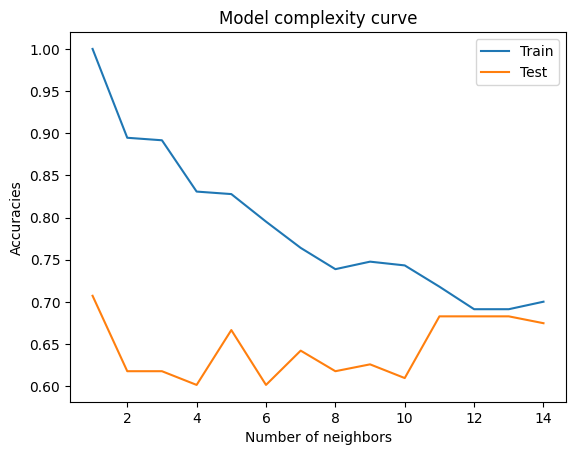

In [88]:
accuracies_training={}
accuracies_testing={}
for i in np.arange(1,15,1):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_resampled,y_resampled)
    scoretrain=knn.score(x_resampled,y_resampled)
    accuracies_training[i]=scoretrain
    scoretest=knn.score(x_test,y_test)
    accuracies_testing[i]=scoretest
#plt.figure(figsize=(3,3))    
plt.plot(np.arange(1,15,1),accuracies_training.values(),label="Train")    
plt.plot(np.arange(1,15,1),accuracies_testing.values(),label="Test")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracies")
plt.title("Model complexity curve")
plt.legend()
plt.show()

In [92]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_resampled,y_resampled)
accuracy_train=knn.score(x_resampled,y_resampled)
print(accuracy_train)
accuracy_test=knn.score(x_test,y_test)
print(accuracy_test)

0.7181008902077152
0.6829268292682927


## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model.fit(x_resampled,y_resampled)
preds=lg_model.predict(x_test)
print(lg_model.score(x_resampled,y_resampled))
print(lg_model.score(x_test,y_test))

0.6780415430267063
0.7154471544715447


In [85]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        38
           1       0.81      0.76      0.79        85

    accuracy                           0.72       123
   macro avg       0.67      0.68      0.68       123
weighted avg       0.73      0.72      0.72       123

